In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [11]:
df=pd.read_csv("loan_800.csv")
df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,Female,Yes,Not Graduate,Yes,Semiurban,0
1,17725,2777,559,12,1,Male,No,Graduate,Yes,Urban,0
2,19730,12298,216,84,1,Male,Yes,Not Graduate,No,Semiurban,1
3,23602,3003,523,84,1,Male,Yes,Graduate,Yes,Urban,0
4,17377,3871,413,36,1,Female,Yes,Graduate,Yes,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,Male,Yes,Graduate,No,Urban,1
796,15120,230,426,240,1,Female,No,Not Graduate,Yes,Semiurban,0
797,3904,14384,552,12,1,Female,Yes,Graduate,Yes,Rural,0
798,16884,12622,428,180,0,Male,Yes,Not Graduate,Yes,Rural,0


In [12]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,0,1,1,1,1,0
1,17725,2777,559,12,1,1,0,0,1,2,0
2,19730,12298,216,84,1,1,1,1,0,1,1
3,23602,3003,523,84,1,1,1,0,1,2,0
4,17377,3871,413,36,1,0,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,1,1,0,0,2,1
796,15120,230,426,240,1,0,0,1,1,1,0
797,3904,14384,552,12,1,0,1,0,1,0,0
798,16884,12622,428,180,0,1,1,1,1,0,0


In [13]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [17]:
accuracy=accuracy_score(y_test,y_pred)   
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score100.00%


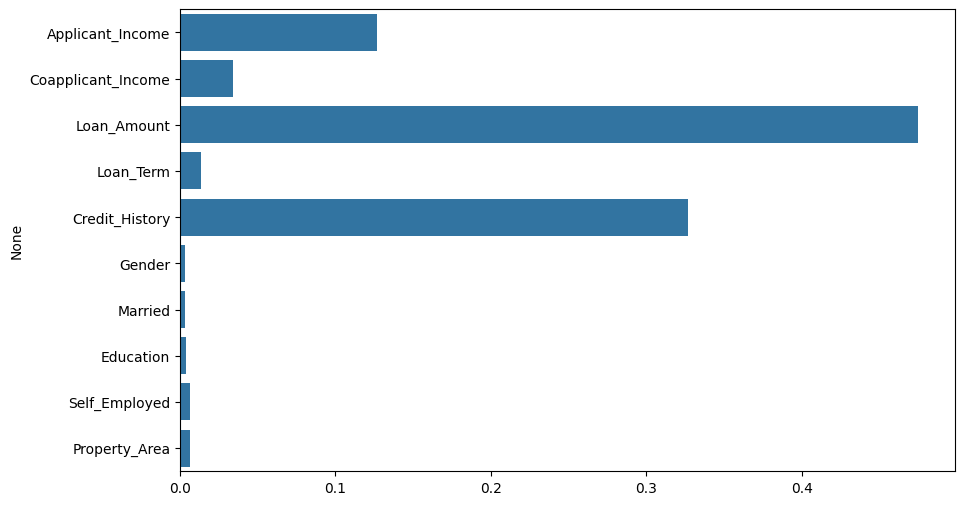

In [18]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [19]:
new_data=pd.DataFrame({
    "Applicant_Income":[65432],
    "Coapplicant_Income":[64332],
    "Loan_Amount":[567],
    "Loan_Term":[36],
    "Credit_History":[1],
    "Gender":label.fit_transform(["Female"]),
    "Married":label.fit_transform(["No"]),
    "Education":label.fit_transform(["Not Graduate"]),
    "Self_Employed":label.fit_transform(["No"]),
    "Property_Area":label.fit_transform(["Urban"])
})
predict=model.predict(new_data)
predict

array([0])